In [ ]:
# magic command to update modules
%load_ext autoreload
%autoreload 2
%xmode verbose

In [32]:
# import visualize from tools
from soda_mmqc.tools.visualize import *

In [ ]:
global_checklist_visualization("fig-checklist")

In [ ]:
check_specific_report("fig-checklist", "error-bars-defined")

In [ ]:
check_specific_report("fig-checklist", "stat-test")

Panel,Problematic Tasks
element_5,panel_label
element_6,panel_label
element_0,justify_why_test_is_missing

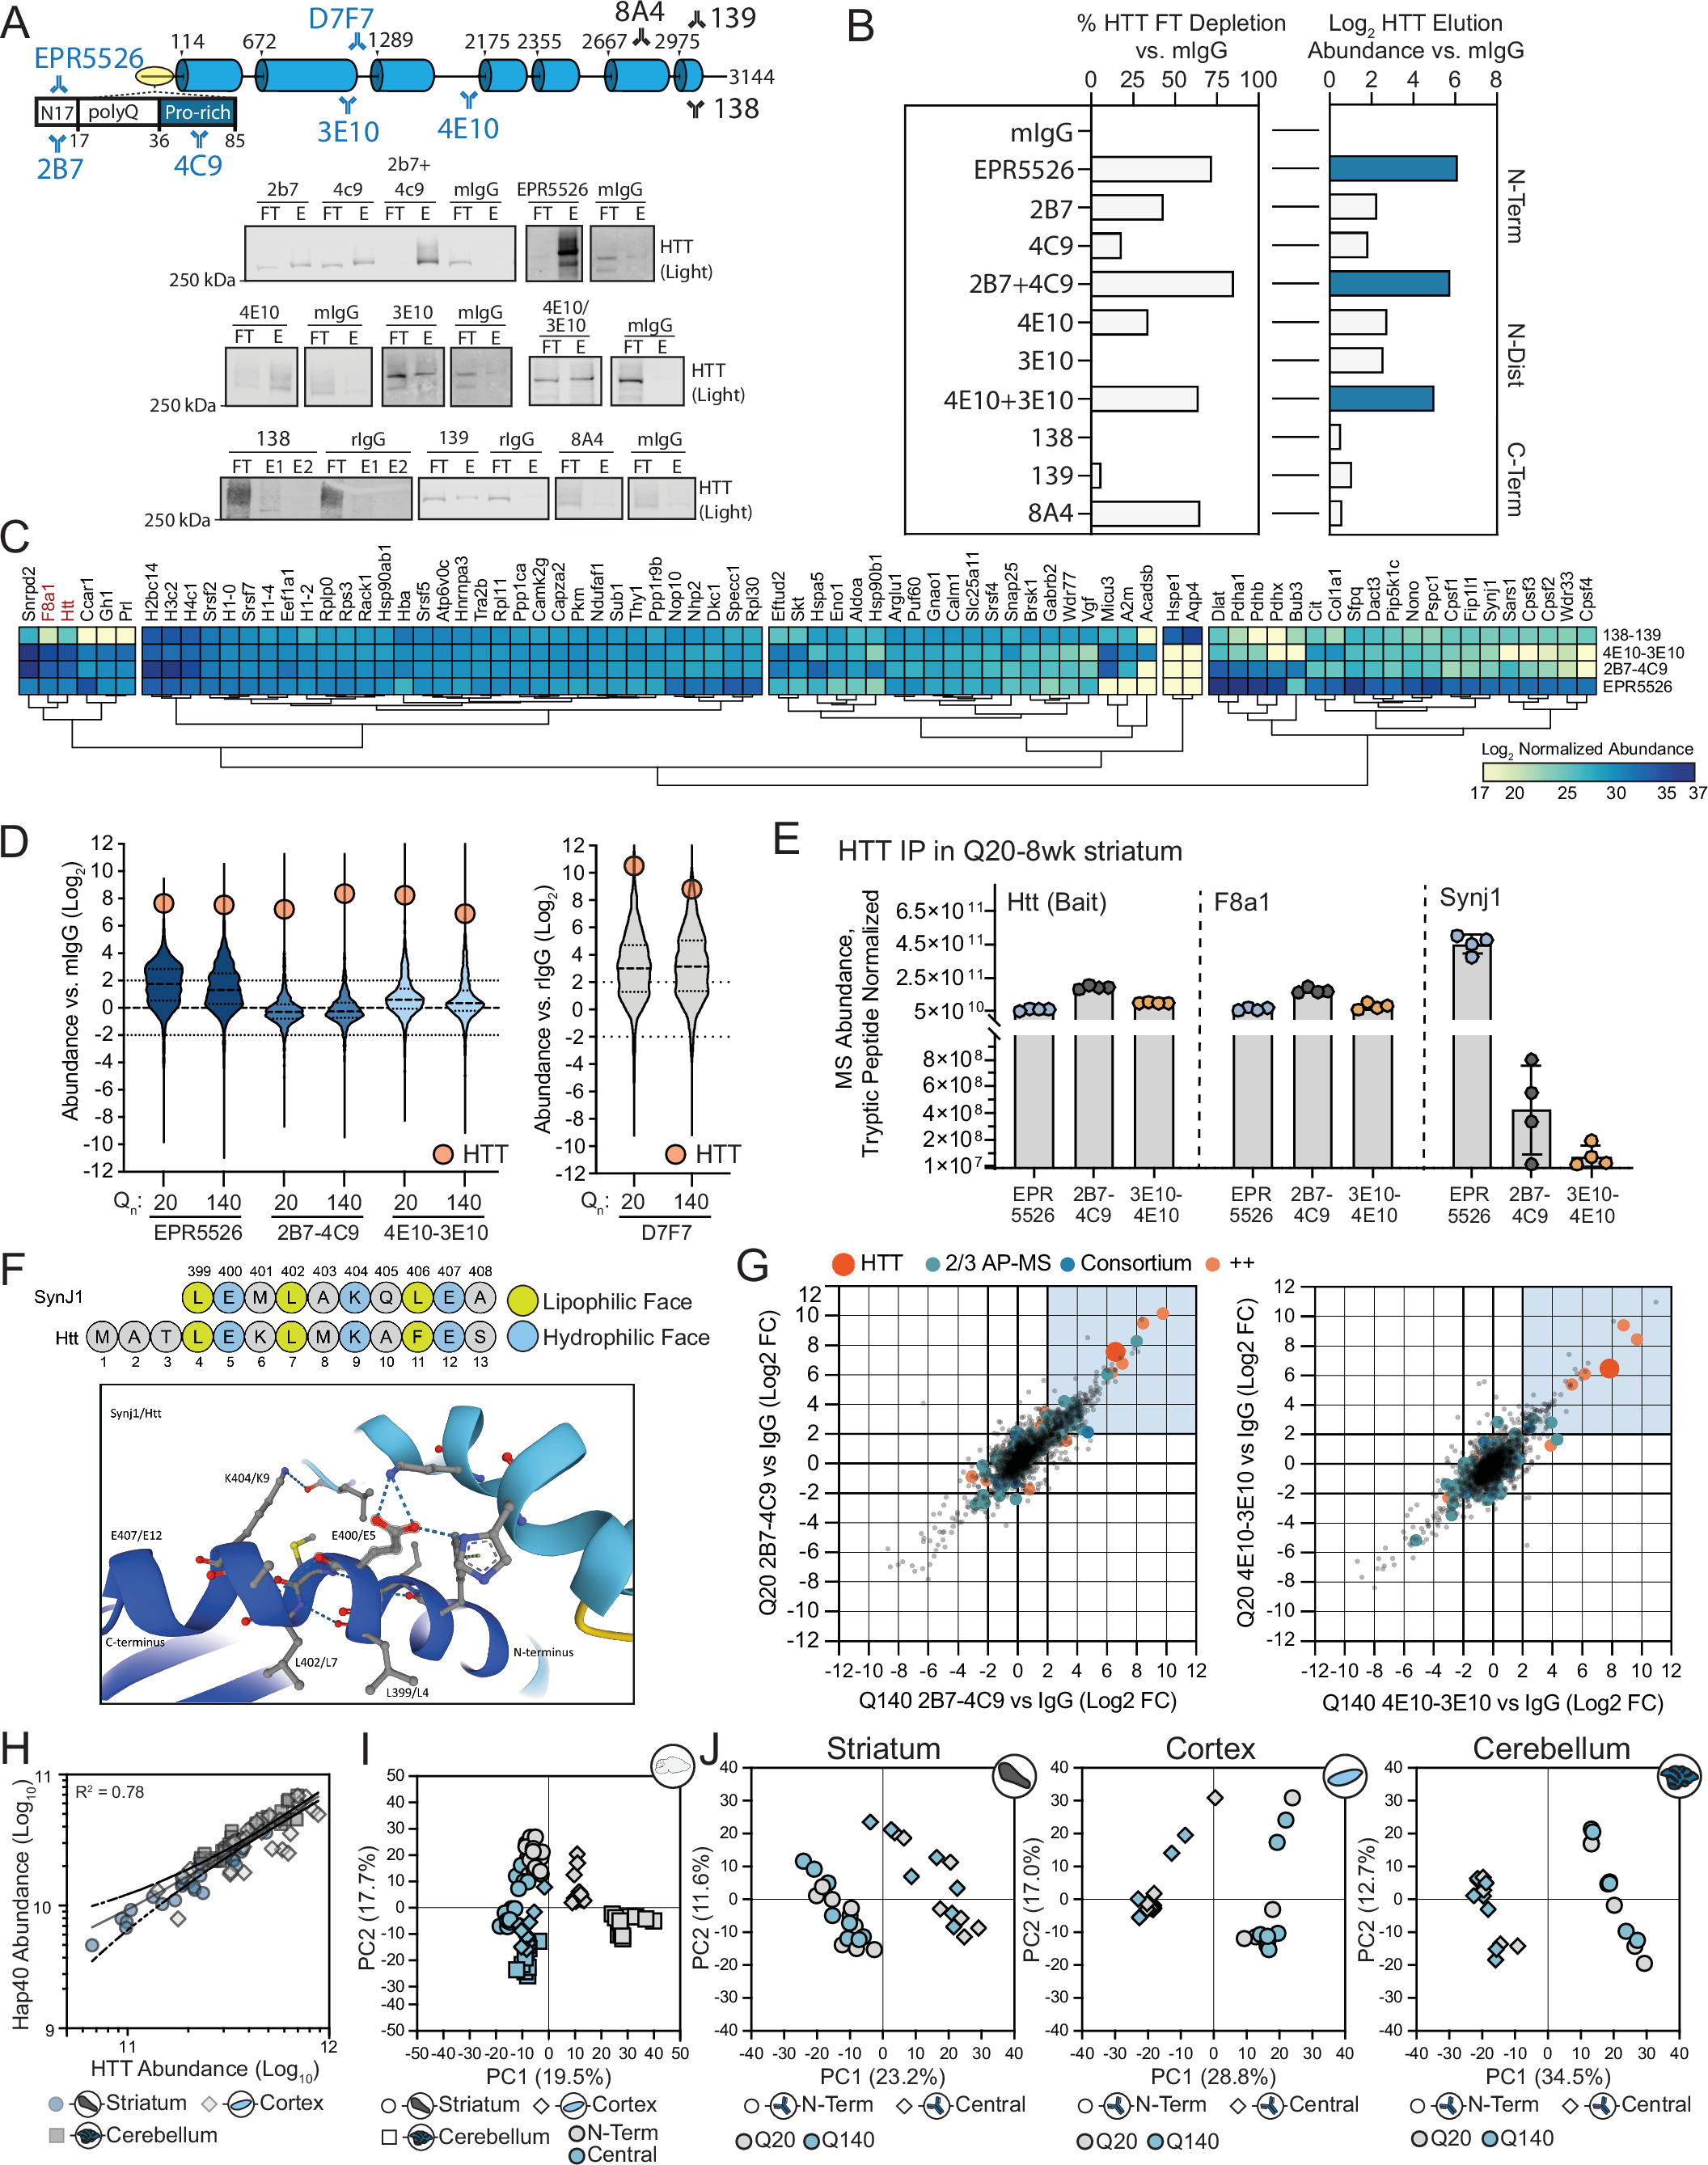

In [36]:
check_specific_report_html("fig-checklist", "stat-test")

In [13]:
df = get_check_data("fig-checklist", "stat-test")

In [14]:
prompts = list(df['prompt'].unique())

In [20]:
prompt = prompts[0]
metric = "semantic_similarity"

In [21]:
plotting_data = df.loc[
    (df['prompt'] == prompt) &
    (df['metric'] == metric) &
    (df['aggregation_level'] == 'panel')
]

In [ ]:
plotting_data

In [32]:
task_data = plotting_data[['doi', 'figure_id', 'panel_id', 'task_scores']]

In [ ]:
task_data

In [35]:
remapped_task_data = pd.DataFrame(columns=[
    'doi', 'figure_id', 'panel_id', 'task', 'score', 'true_positives', 'false_positives', 'false_negatives'
])

In [36]:
for j, row in task_data.iterrows():
    task_scores = row['task_scores']
    for key, value in task_scores.items():
        remapped_task_data.loc[len(remapped_task_data)] = {
            'doi': row['doi'],
            'figure_id': row['figure_id'],
            'panel_id': row['panel_id'],
            'task': key,
            'score': value['score'],
            'true_positives': value['true_positives'],
            'false_positives': value['false_positives'],
            'false_negatives': value['false_negatives']
        }

In [ ]:
remapped_task_data.loc[remapped_task_data['task'] == 'panel_label', 'score'].mean()

In [ ]:
# find the rows where panel_label score is less than 1.0
bad_panels = remapped_task_data[remapped_task_data['task'] == 'panel_label'][remapped_task_data['score'] < 1.0]
bad_panels


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "notebook"

px.box(remapped_task_data, x='task', y='score', color='task', title=f'{prompt} - {metric}')